## Специализированные программные библиотеки для анализа данных.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
os.chdir('/content/drive/My Drive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021')

### Импортируем необходимые модули 

In [4]:
import numpy as np
import scipy, datetime
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#sns.set()
# с помощью этой строки мы можем включать в этот документ графики:
%matplotlib inline 

#### Укажите ФИО и группу


##### Разминка

In [5]:
from sklearn.decomposition import PCA
from sklearn.datasets import *

## Загрузите игрушечный набор -- ирисы
iris = load_iris()
X = iris.data
y = iris.target
## создадим датафрейм
X = pd.DataFrame(iris.data.T, index = iris.feature_names).T

In [6]:
## посмотрите на ваши данные
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
## изобразите распределение значений параметров вашего набора
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


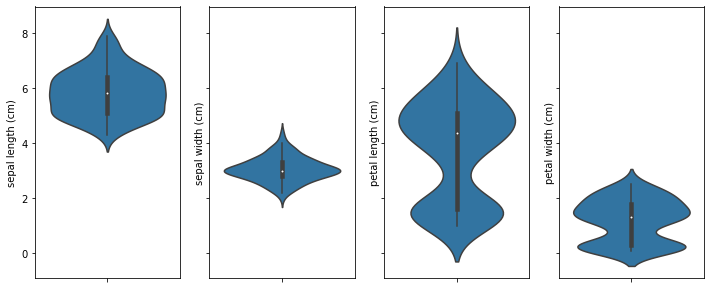

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5), sharey=True)
sns.violinplot(y = 'sepal length (cm)', data = X, ax = axes[0])
sns.violinplot(y = 'sepal width (cm)', data = X, ax = axes[1])
sns.violinplot(y = 'petal length (cm)', data = X, ax = axes[2])
sns.violinplot(y = 'petal width (cm)', data = X, ax = axes[3])

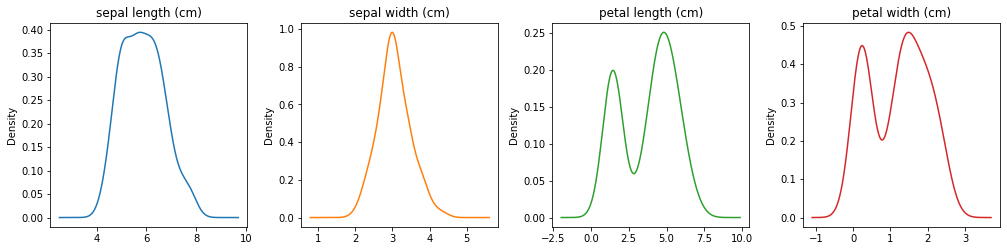

In [9]:
_ = X.iloc[:].plot(kind='kde', subplots=True, layout=(4,4), sharex=False, 
                         sharey=False, figsize=[14,13], legend = False,
                         title = X.columns.values.tolist())
plt.tight_layout();

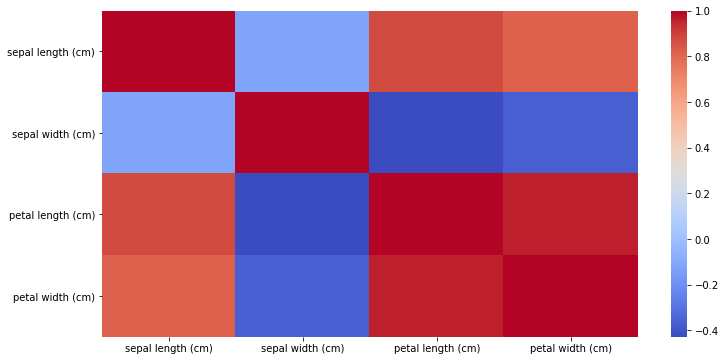

In [10]:
plt.figure(figsize = (12,6))
sns.heatmap(X.corr(), cmap = 'coolwarm');

##### Визуализация результатов PCA

In [11]:
## проведите анализ PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Xsc = StandardScaler().fit_transform(X.astype('float64'))
pca = PCA(n_components=4)
X_pca = pd.DataFrame(pca.fit_transform(Xsc), columns = ['PC1','PC2','PC3','PC4'])

pca_unsc = PCA(n_components=4)
X_pca_unsc = pd.DataFrame(pca_unsc.fit_transform(X), columns = ['PC1','PC2','PC3','PC4'])

In [12]:
## постройте диаграмму рассеяния в координатах PC1, PC2
## цвет точек должен соответствовать целевой переменной - y - один из 3 видов

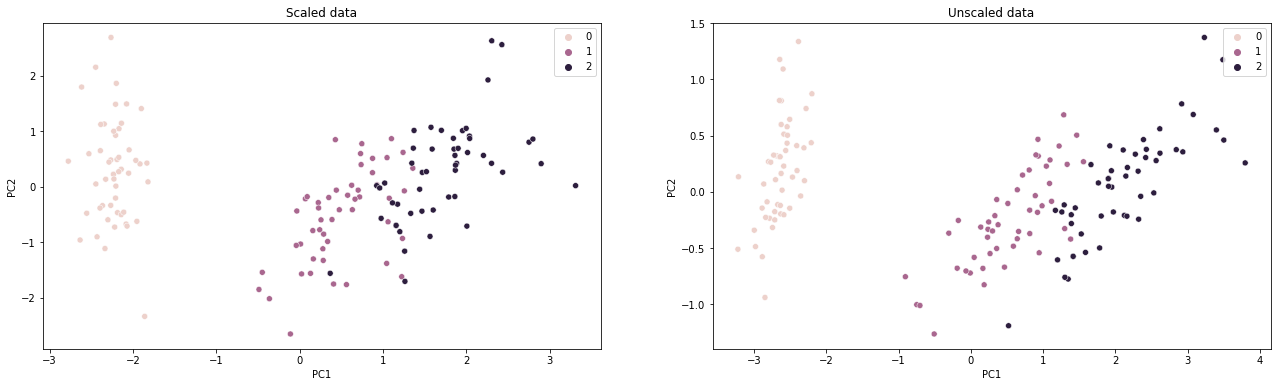

In [13]:
_ , axes = plt.subplots(ncols=2, nrows=1, figsize = (22, 6))
axes[0].set_title('Scaled data')
sp = sns.scatterplot(x='PC1', y='PC2', data=X_pca, hue=y, ax=axes[0])
axes[1].set_title('Unscaled data')
sp_unsc = sns.scatterplot(x='PC1', y='PC2', data=X_pca_unsc, hue=y, ax=axes[1])

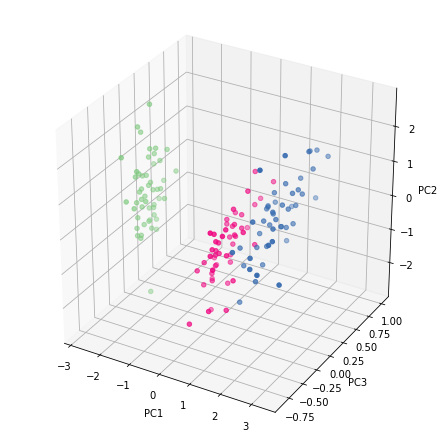

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

cmap = ListedColormap(['#7fc97f', '#f0027f', '#386cb0'])
ax.set_xlabel('PC1', fontsize=10)
ax.set_ylabel('PC3', fontsize=10)
ax.set_zlabel('PC2', fontsize=10)
ax.scatter(X_pca['PC1'], X_pca['PC3'], X_pca['PC2'], cmap=cmap, c=y)

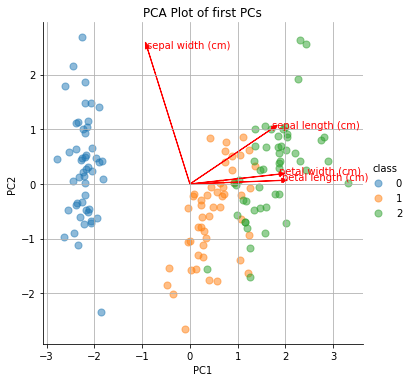

In [15]:
## постройте биплот, отражающий влияние исходных параметров на PC1 и PC2
df_pca = pd.DataFrame(X_pca)
df_pca = pd.concat([pd.DataFrame(y), df_pca], axis = 1)
df_pca.columns = ['class','PC1', 'PC2','PC3', 'PC4']


sns.lmplot(x = 'PC1', y = 'PC2', data=df_pca, fit_reg = False, 
           hue = 'class', scatter_kws={"s": 50, 'alpha':0.5})
 
xvector = pca.components_[0]
yvector = pca.components_[1]
 
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*df_pca.PC1.max(), yvector[i]*df_pca.PC2.max(),
              color='r', width=0.005, head_width=0.08)
    plt.text(xvector[i]*df_pca.PC1.max(), yvector[i]*df_pca.PC2.max(),
             list(X.columns.values)[i], color='r')
    
plt.grid()
_ = plt.title('PCA Plot of first PCs')


##### Набор данных -- уже не столь свежая сводка по эпидемиологической обстановке в России

In [30]:
# прочитайте данные из файла, который вы создали на прошлом занятии
## В вашей таблице должны быть колонки:
## "Активных" - число активных случаев = 'Заражений' - 'Выздоровлений' - 'Смертей'
## "Активных на 100К населения"
## "Заражений на 100К населения"
## "Смертей на 100К населения"
## "Заражений за день на 100К населения"
## "Смертей за день на 100К населения"

## Проверьте, что колонка "Дата" относится к типу "datetime64", если нет -- преобразуйте
## В качестве индексов используйте колонки "Регион" и "Дата"
ncov_ru_j = pd.read_csv('ncov_ru_j.csv',sep=',')
ncov_ru_j['Дата'] = ncov_ru_j['Дата'].astype('datetime64')
# ncov_ru_j = pd.read_csv('COVID_RU_Ya.csv')
# ncov_ru_j["Активных"] = ncov_ru_j['Заражений'] - ncov_ru_j['Выздоровлений'] - ncov_ru_j['Смертей']
# ncov_ru_j["Активных на 100К населения"] = ncov_ru_j["Активных"]*10**5/ncov_ru_j["Регион население"]
# ncov_ru_j["Заражений на 100К населения"] = ncov_ru_j["Заражений"]*10**5/ncov_ru_j["Регион население"]
# ncov_ru_j["Смертей на 100К населения"] = ncov_ru_j["Смертей"]*10**5/ncov_ru_j["Регион население"]
# ncov_ru_j["Заражений за день на 100К населения"] = ncov_ru_j["Заражений за день"]*10**5/ncov_ru_j["Регион население"]
# ncov_ru_j["Смертей за день на 100К населения"] = ncov_ru_j["Смертей за день"]*10**5/ncov_ru_j["Регион население"]
# ncov_ru_j['Дата'] = pd.to_datetime(ncov_ru_j['Дата'], format = '%d.%m.%Y')

ncov_ru_j.set_index(['Регион', 'Дата'], inplace=True)
ncov_ru_j.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
ncov_ru_j

Заражений  ...  Смертей за день на 100К населения
Регион          Дата                   ...                                   
Мурманская обл. 2020-12-03          0  ...                                0.0
                2020-03-13          0  ...                                0.0
                2020-03-14          0  ...                                0.0
                2020-03-15          0  ...                                0.0
                2020-03-16          0  ...                                0.0
...                               ...  ...                                ...
Алтай           2020-04-11       8111  ...                                0.0
                2020-05-11       8275  ...                                0.0
                2020-06-11       8438  ...                                0.0
                2020-07-11       8545  ...                                0.0
                2020-08-11       8681  ...                                0.0

[20523 rows x 16 columns]

In [18]:
ncov_ru_j.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20523 entries, ('Мурманская обл.', Timestamp('2020-12-03 00:00:00')) to ('Алтай', Timestamp('2020-08-11 00:00:00'))
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Заражений                            20523 non-null  int64  
 1   Выздоровлений                        20523 non-null  int64  
 2   Смертей                              20523 non-null  int64  
 3   Смертей за день                      20523 non-null  int64  
 4   Заражений за день                    20523 non-null  int64  
 5   Выздоровлений за день                20523 non-null  int64  
 6   Летальность, %                       19622 non-null  float64
 7   ФО                                   20523 non-null  object 
 8   Регион название                      20523 non-null  object 
 9   Регион население                     20523 non-null  int64  
 10  Акти

In [19]:
## определите прирост числа заражений в процентах за неделю -- как вы это сделаете вопрос
infected_per_day = ncov_ru_j['Заражений за день'].sort_index()
infected_per_day = infected_per_day.unstack()

In [20]:
infected_per_day

Дата,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,...,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10
Регион,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Адыгея,0.0,2.0,20.0,37.0,28.0,14.0,34.0,64.0,1.0,3.0,16.0,46.0,28.0,20.0,35.0,65.0,0.0,10.0,14.0,58.0,27.0,20.0,37.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,43.0,18.0,20.0,20.0,41.0,45.0,47.0,51.0,50.0,53.0,55.0,61.0,64.0,67.0,72.0,74.0,78.0,73.0,75.0,70.0,70.0,72.0,68.0,69.0,0.0,17.0,55.0,19.0,21.0,22.0,38.0,0.0,0.0,11.0,38.0,18.0,19.0,21.0,43.0
Алтай,0.0,1.0,10.0,31.0,28.0,20.0,66.0,196.0,0.0,2.0,1.0,64.0,27.0,19.0,84.0,184.0,0.0,1.0,5.0,32.0,25.0,28.0,87.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,14.0,31.0,15.0,27.0,111.0,43.0,134.0,102.0,86.0,119.0,133.0,133.0,197.0,160.0,159.0,219.0,192.0,192.0,147.0,147.0,144.0,197.0,172.0,178.0,0.0,2.0,8.0,43.0,7.0,31.0,107.0,NaN,0.0,2.0,8.0,17.0,8.0,55.0,81.0
Алтайский край,1.0,41.0,67.0,74.0,108.0,61.0,98.0,223.0,1.0,28.0,70.0,75.0,109.0,63.0,101.0,227.0,0.0,47.0,81.0,73.0,107.0,64.0,103.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,66.0,240.0,95.0,62.0,154.0,170.0,172.0,178.0,181.0,184.0,185.0,185.0,305.0,205.0,203.0,204.0,206.0,207.0,210.0,214.0,218.0,216.0,219.0,217.0,8.0,38.0,69.0,228.0,91.0,63.0,162.0,0.0,0.0,20.0,66.0,232.0,88.0,61.0,169.0
Амурская обл.,0.0,11.0,22.0,27.0,24.0,32.0,35.0,145.0,0.0,5.0,18.0,31.0,25.0,31.0,36.0,156.0,0.0,7.0,20.0,30.0,23.0,30.0,39.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,39.0,44.0,18.0,29.0,57.0,54.0,58.0,62.0,61.0,65.0,68.0,63.0,81.0,105.0,103.0,106.0,104.0,108.0,112.0,109.0,111.0,128.0,132.0,139.0,2.0,12.0,38.0,38.0,15.0,31.0,55.0,NaN,0.0,17.0,41.0,40.0,16.0,30.0,57.0
Архангельская обл.,0.0,15.0,135.0,118.0,57.0,63.0,141.0,365.0,0.0,25.0,56.0,116.0,75.0,49.0,147.0,378.0,1.0,22.0,239.0,119.0,59.0,48.0,160.0,387.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,25.0,132.0,112.0,63.0,85.0,199.0,198.0,195.0,193.0,197.0,207.0,218.0,228.0,246.0,247.0,256.0,263.0,272.0,286.0,298.0,312.0,317.0,319.0,325.0,334.0,0.0,32.0,145.0,114.0,48.0,83.0,246.0,NaN,0.0,37.0,112.0,115.0,65.0,83.0,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чечня,1.0,19.0,20.0,10.0,12.0,4.0,6.0,13.0,0.0,21.0,17.0,13.0,10.0,6.0,7.0,13.0,2.0,28.0,14.0,12.0,11.0,6.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,...,26.0,16.0,5.0,5.0,5.0,5.0,5.0,4.0,6.0,4.0,5.0,6.0,7.0,6.0,4.0,6.0,8.0,9.0,9.0,9.0,10.0,10.0,11.0,12.0,14.0,8.0,28.0,20.0,7.0,6.0,6.0,7.0,0.0,17.0,26.0,21.0,11.0,7.0,4.0,7.0
Чувашия,0.0,41.0,88.0,58.0,40.0,29.0,26.0,58.0,0.0,49.0,88.0,60.0,37.0,33.0,27.0,60.0,0.0,55.0,87.0,59.0,35.0,29.0,28.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,79.0,61.0,30.0,27.0,31.0,35.0,38.0,40.0,38.0,42.0,44.0,49.0,45.0,47.0,52.0,54.

In [21]:
# количество зараженных по неделям
infected_dates = infected_per_day.columns.strftime('%V')
infected_per_week = infected_per_day.groupby(infected_dates, axis=1).sum()

In [22]:
# в абсолютных значениях
infected_per_week

Дата,01,02,06,07,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49,50
Регион,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Адыгея,2.0,197.0,114.0,100.0,109.0,118.0,0.0,1.0,12.0,217.0,71.0,43.0,29.0,139.0,216.0,273.0,183.0,78.0,219.0,230.0,254.0,107.0,212.0,122.0,204.0,179.0,121.0,191.0,121.0,130.0,76.0,123.0,149.0,190.0,98.0,146.0,301.0,489.0,424.0,112.0,60.0,49.0,101.0
Алтай,1.0,351.0,113.0,268.0,63.0,226.0,0.0,0.0,0.0,327.0,2.0,13.0,17.0,161.0,183.0,20.0,27.0,28.0,320.0,165.0,176.0,55.0,268.0,186.0,198.0,114.0,79.0,313.0,174.0,133.0,37.0,223.0,354.0,452.0,212.0,199.0,617.0,1252.0,985.0,60.0,138.0,10.0,161.0
Алтайский край,42.0,631.0,346.0,328.0,308.0,392.0,0.0,0.0,41.0,644.0,43.0,211.0,99.0,454.0,424.0,400.0,523.0,225.0,632.0,503.0,533.0,171.0,752.0,1561.0,1149.0,578.0,439.0,719.0,563.0,469.0,156.0,584.0,459.0,559.0,277.0,645.0,1070.0,1515.0,1294.0,434.0,225.0,86.0,550.0
Амурская обл.,11.0,285.0,110.0,192.0,80.0,227.0,0.0,1.0,8.0,298.0,10.0,20.0,20.0,165.0,215.0,133.0,151.0,79.0,363.0,322.0,311.0,62.0,338.0,296.0,207.0,152.0,137.0,279.0,129.0,166.0,91.0,161.0,200.0,212.0,90.0,192.0,368.0,670.0,731.0,105.0,86.0,58.0,143.0
Архангельская обл.,15.0,879.0,321.0,525.0,440.0,595.0,2.0,1.0,43.0,957.0,83.0,60.0,31.0,623.0,571.0,332.0,913.0,259.0,899.0,828.0,815.0,242.0,921.0,831.0,546.0,345.0,392.0,821.0,538.0,477.0,176.0,529.0,631.0,694.0,370.0,616.0,1208.0,1798.0,1905.0,339.0,329.0,149.0,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чечня,20.0,65.0,67.0,20.0,67.0,26.0,0.0,9.0,33.0,57.0,172.0,190.0,76.0,87.0,153.0,147.0,137.0,65.0,87.0,119.0,94.0,49.0,77.0,87.0,81.0,60.0,77.0,61.0,38.0,37.0,52.0,33.0,37.0,35.0,15.0,62.0,30.0,49.0,66.0,69.0,13.0,64.0,29.0
Чувашия,41.0,299.0,267.0,87.0,236.0,115.0,1.0,0.0,64.0,296.0,143.0,228.0,165.0,290.0,481.0,590.0,595.0,202.0,309.0,508.0,432.0,164.0,305.0,386.0,313.0,205.0,293.0,236.0,237.0,227.0,181.0,184.0,182.0,185.0,100.0,291.0,237.0,359.0,348.0,253.0,59.0,149.0,151.0
Чукотский АО,2.0,5.0,6.0,2.0,8.0,7.0,0.0,0.0,0.0,8.0,2.0,13.0,3.0,10.0,29.0,3.0,21.0,7.0,17.0,4.0,5.0,1.0,16.0,2.0,5.0,1.0,2.0,4.0,3.0,4.0,5.0,8.0,3.0,8.0,2.0,7.0,10.0,10.0,11.0,3.0,3.0,6.0,1.0


In [23]:
# в процентах
infected_per_week.pct_change(axis=1).mul(100).round(2)

Дата,01,02,06,07,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49,50
Регион,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Адыгея,NaN,9750.00,-42.13,-12.28,9.00,8.26,-100.00,inf,1100.00,1708.33,-67.28,-39.44,-32.56,379.31,55.40,26.39,-32.97,-57.38,180.77,5.02,10.43,-57.87,98.13,-42.45,67.21,-12.25,-32.40,57.85,-36.65,7.44,-41.54,61.84,21.14,27.52,-48.42,48.98,106.16,62.46,-13.29,-73.58,-46.43,-18.33,106.12
Алтай,NaN,35000.00,-67.81,137.17,-76.49,258.73,-100.00,NaN,NaN,inf,-99.39,550.00,30.77,847.06,13.66,-89.07,35.00,3.70,1042.86,-48.44,6.67,-68.75,387.27,-30.60,6.45,-42.42,-30.70,296.20,-44.41,-23.56,-72.18,502.70,58.74,27.68,-53.10,-6.13,210.05,102.92,-21.33,-93.91,130.00,-92.75,1510.00
Алтайский край,NaN,1402.38,-45.17,-5.20,-6.10,27.27,-100.00,NaN,inf,1470.73,-93.32,390.70,-53.08,358.59,-6.61,-5.66,30.75,-56.98,180.89,-20.41,5.96,-67.92,339.77,107.58,-26.39,-49.70,-24.05,63.78,-21.70,-16.70,-66.74,274.36,-21.40,21.79,-50.45,132.85,65.89,41.59,-14.59,-66.46,-48.16,-61.78,539.53
Амурская обл.,NaN,2490.91,-61.40,74.55,-58.33,183.75,-100.00,inf,700.00,3625.00,-96.64,100.00,0.00,725.00,30.30,-38.14,13.53,-47.68,359.49,-11.29,-3.42,-80.06,445.16,-12.43,-30.07,-26.57,-9.87,103.65,-53.76,28.68,-45.18,76.92,24.22,6.00,-57.55,113.33,91.67,82.07,9.10,-85.64,-18.10,-32.56,146.55
Архангельская обл.,NaN,5760.00,-63.48,63.55,-16.19,35.23,-99.66,-50.0,4200.00,2125.58,-91.33,-27.71,-48.33,1909.68,-8.35,-41.86,175.00,-71.63,247.10,-7.90,-1.57,-70.31,280.58,-9.77,-34.30,-36.81,13.62,109.44,-34.47,-11.34,-63.10,200.57,19.28,9.98,-46.69,66.49,96.10,48.84,5.95,-82.20,-2.95,-54.71,238.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чечня,NaN,225.00,3.08,-70.15,235.00,-61.19,-100.00,inf,266.67,72.73,201.75,10.47,-60.00,14.47,75.86,-3.92,-6.80,-52.55,33.85,36.78,-21.01,-47.87,57.14,12.99,-6.90,-25.93,28.33,-20.78,-37.70,-2.63,40.54,-36.54,12.12,-5.41,-57.14,313.33,-51.61,63.33,34.69,4.55,-81.16,392.31,-54.69
Чувашия,NaN,629.27,-10.70,-67.42,171.26,-51.27,-99.13,-100.0,inf,362.50,-51.69,59.44,-27.63,75.76,65.86,22.66,0.85,-66.05,52.97,64.40,-14.96,-62.04,85.98,26.56,-18.91,-34.50,42.93,-19.45,0.42,-4.22,-20.26,1.66,-1.09,1.65,-45.95,191.00,-18.56,51.48,-3.06,-27.30,-76.68,152.54,1.34
Чукотский АО,NaN,150.00,20.00,-66.67,300.00,-12.50,-100.00,NaN,NaN,inf,-75.00,550.00,-76.92,233.33,190.00,-89.66,600.00,-66.67,142.86,-76.47,25.00,-80.00,1500.00,-87.50,150.00,-80.00,100.00,100.00,-25.00,33.33,25.00,60.00,-62.50,166.67,-75.00,250.00,42.86,0.00,10.00,-72.73,0.00,100.00,-83.33


In [24]:
## Можно было и так...
ncov_ru_j['Заражений за день'].groupby([ pd.Grouper(level='Регион'), pd.Grouper(freq='W', level='Дата') ] ).sum().pct_change().mul(100).round(2)

Регион            Дата      
Адыгея            2020-01-05        NaN
                  2020-01-12    9750.00
                  2020-02-09     -42.13
                  2020-02-16     -12.28
                  2020-03-08       9.00
                                 ...   
Ярославская обл.  2020-11-01      -7.50
                  2020-11-08     -69.27
                  2020-11-15     -38.89
                  2020-12-06      18.94
                  2020-12-13      27.39
Name: Заражений за день, Length: 3655, dtype: float64

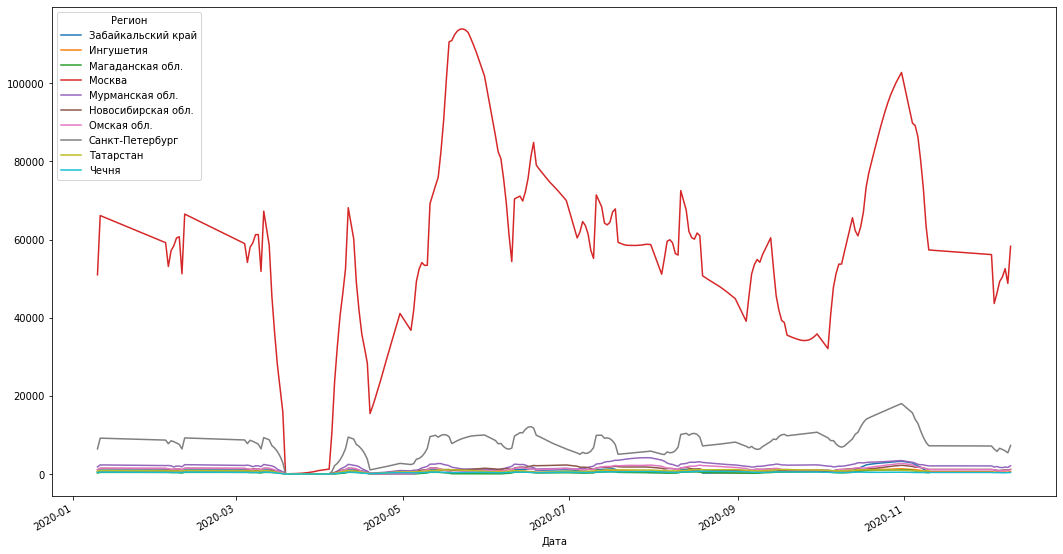

In [25]:
## если не получится -- просто постройте графики среднего числа активных случаев 
## на 100 тыс. населения со скользящим окном в 7 дней
## пример, как посчитать был на предыдущих занятиях -- ближе к концу в ноутбуке №2
## постройте график для следующих регионов:
regs = ['Забайкальский край', 'Ингушетия', 'Магаданская обл.', 'Москва', 'Мурманская обл.', 
        'Новосибирская обл.', 'Омская обл.', 'Санкт-Петербург', 'Татарстан', 'Чечня']
ncov_ru_j.loc[regs]['Активных'].unstack().T.rolling(7).mean().plot(figsize=(18,10))
## на самом деле смысла в выборе именно этих регионов нет -- можете выбрать другие какие вам нравятся. 
## Просто если мы сразу отрисуем все регионы на одном графике -- он получится нечитаемым

In [26]:
# заменим номера недель в infected_per_week на дату начала недели, чтобы можно было установить временные границы на графике
cols = infected_per_day.columns
new_cols = [cols[0]]
for i in range(1,len(cols)):
  if infected_dates[i] != infected_dates[i-1]:
    new_cols.append(cols[i])
    
infected_per_week.columns = new_cols

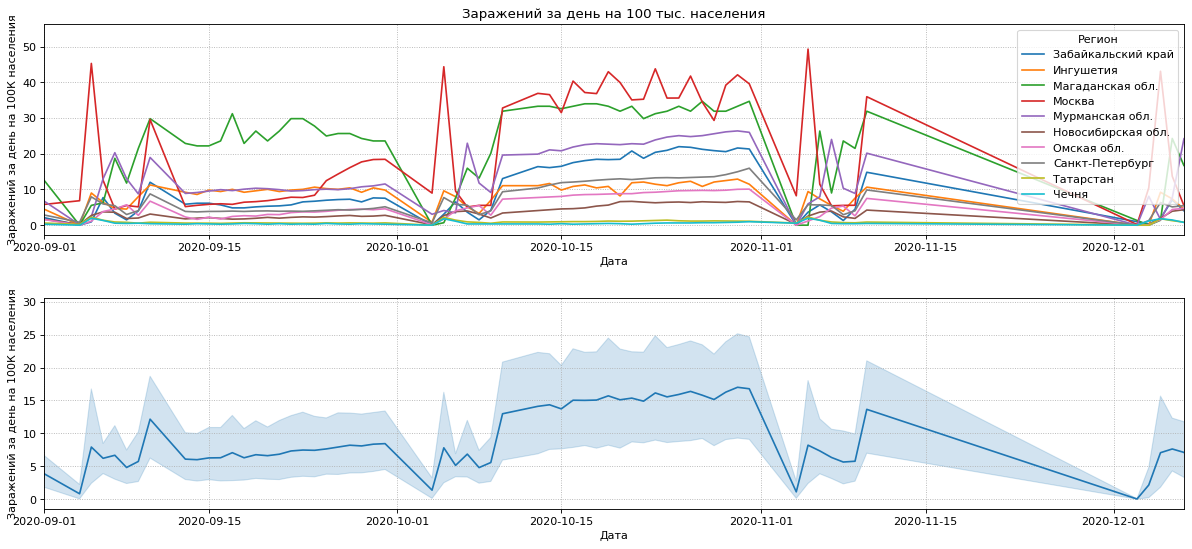

In [27]:
## Постройте график изменения прироста числа заражений начиная с сентября
## с помощью sns.lineplot  
## создаете figure и axes, задаете размер фигуры и разрешение: 
fig, ax = plt.subplots(figsize = [15, 7], dpi = 80, nrows=2) ## например так
sns.lineplot( 
    x = 'Дата', 
              y = 'Заражений за день на 100К населения', 
              data = ncov_ru_j.loc[regs],
              hue = 'Регион',
              ax = ax[0] )
sns.lineplot( 
    x = 'Дата', 
              y = 'Заражений за день на 100К населения', 
              data = ncov_ru_j.loc[regs],
              # hue = 'Регион',
              ax = ax[1] )
ax[0].set_title('Заражений за день на 100 тыс. населения')
ax[0].grid(ls =':')
## Если вы считаете, что данные лучше смотреть в логарифмической шкале, можете раскомментировать код, приведенный ниже
#ax.set_xscale('log', base=10);
#ax.set_yscale('log', base=10);
## Помним про необходимость установить временные границы
ax[0].set_xlim([pd.to_datetime('2020-09-01'), new_cols[-1] ]);

ax[1].grid(ls =':')
## Если вы считаете, что данные лучше смотреть в логарифмической шкале, можете раскомментировать код, приведенный ниже
#ax.set_xscale('log', base=10);
#ax.set_yscale('log', base=10);
## Помним про необходимость установить временные границы
ax[1].set_xlim([pd.to_datetime('2020-09-01'), new_cols[-1] ]);

plt.tight_layout()

## кстати, что произойдет, если вы не будете указывать hue? Постройте и такой график
## лучше всего будет, если вы построите оба графика в одной фигуре -- в plt.subplots нужно указать число строк с помощью параметра nrows

In [28]:
## дополнительная задача -- постройте график №1 из предыдущей клетки с помощью bokeh, holoviews или plotly
## пример с holoviews есть в ноутбуке №3 -- про траты на здравоохранение по странам по данным ВОЗ
#import bokeh # библиотека для построения интерактивных графиков
#!pip install holoviews ## -- если вам нужна эта библиотека -- установите ее
#import holoviews as hv # импортируем holoviews
#from bokeh.io import output_notebook
#from bokeh.resources import INLINE
#import holoviews.plotting.bokeh
#output_notebook(resources=INLINE)
#os.environ['HV_DOC_HTML'] = 'true'

Домашнее задание сдаем в виде ноутбука *.ipynb -- можно расшарить ноутбук в Colab'е.  
Обязательно указываем ФИО  
Вопросы категорически приветствуются.